# Solving real world data science tasks with Python Pandas!

* Video Link: https://www.youtube.com/watch?v=eMOA1pPVUc4&list=PLFCB5Dp81iNWRZu_TqtS5NPYvyfcyrD3F    
* Dataset Link: https://github.com/KeithGalli/Pandas-Data-Science-Tasks

## Background info:
    
This repo goes with my video on "Solving real world data science videos with Python Pandas!". Here is some information on that video.

In this video we use Python Pandas & Python Matplotlib to analyze and answer business questions about 12 months worth of sales data. The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost, purchase address, etc.

We start by cleaning our data. Tasks during this section include:

* Drop NaN values from DataFrame
* Removing rows based on a condition
* Change the type of columns (to_numeric, to_datetime, astype)

Once we have cleaned up our data a bit, we move the data exploration section. In this section we explore 5 high level business questions related to our data:

* What was the best month for sales? How much was earned that month?
* What city sold the most product?
* What time should we display advertisemens to maximize the likelihood of customer’s buying product?
* What products are most often sold together?
* What product sold the most? Why do you think it sold the most?


To answer these questions we walk through many different pandas & matplotlib methods. They include:

* Concatenating multiple csvs together to create a new DataFrame (pd.concat)
* Adding columns
* Parsing cells as strings to make new columns (.str)
* Using the .apply() method
* Using groupby to perform aggregate analysis
* Plotting bar charts and lines graphs to visualize our results
* Labeling our graphs


# Import Necessary Libraries

In [1]:
import pandas as pd

# Question 1: Merging 12 months of sales data into a single file

In [2]:
import os 

os.chdir('/Users/irina/Desktop/Python/Keith Galli/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')
files = os.listdir('/Users/irina/Desktop/Python/Keith Galli/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')
df = pd.DataFrame()

for file in files:
    print(file)
    data = pd.read_csv(file)

    df = pd.concat([df, data])

Sales_December_2019.csv
Sales_April_2019.csv
Sales_February_2019.csv
Sales_March_2019.csv
Sales_August_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_January_2019.csv
Sales_September_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv


In [3]:
# export the combined dataset 

os.chdir('/Users/irina/Desktop/Python/Keith Galli/Pandas-Data-Science-Tasks-master/SalesAnalysis')
df.to_csv('all_data.csv', index = False)

Read in updated dataframe

In [2]:
all_data = pd.read_csv('all_data.csv')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


# Data cleaning

In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


## Drop all NA columns

In [5]:
all_data[all_data.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185795,NaN,NaN,NaN,NaN,NaN,NaN
185868,NaN,NaN,NaN,NaN,NaN,NaN
185887,NaN,NaN,NaN,NaN,NaN,NaN
185960,NaN,NaN,NaN,NaN,NaN,NaN


Drop rows of NAN

In [6]:
# all rows where all values are missing

all_data.dropna(how = 'all', inplace = True)
all_data.reset_index(drop = True)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186300,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186301,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186302,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186303,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [7]:
all_data.drop_duplicates(inplace = True)

In [8]:
all_data = all_data.sort_values(['Order Date']).reset_index(drop = True)

In [9]:
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185682,297481,AA Batteries (4-pack),1,3.84,12/31/19 23:42,"82 Hill St, Dallas, TX 75001"
185683,317048,AAA Batteries (4-pack),2,2.99,12/31/19 23:45,"743 Adams St, San Francisco, CA 94016"
185684,309773,AAA Batteries (4-pack),1,2.99,12/31/19 23:52,"60 Hickory St, Los Angeles, CA 90001"
185685,297674,AAA Batteries (4-pack),1,2.99,12/31/19 23:53,"425 Lake St, Portland, OR 97035"
185686,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [10]:
all_data.drop(all_data.tail(1).index,inplace=True)

## Change unproper data types

In [11]:
all_data["Quantity Ordered"] = all_data["Quantity Ordered"].astype(float)
all_data["Price Each"] = all_data["Price Each"].astype(float)

Alternative way to change to numeric data type

In [12]:
# all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
# all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])

## Add Year, Month, Date, and time columns

change the order date to datetime format 

In [67]:
# pd.to_datetime('01/01/19 03:07', format='%m/%d/%y %H:%M')

all_data['Order Date'] =  pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Dates,Order_Month,Order_Time,Sales,City,State,City_State
0,147268,Wired Headphones,1.0,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",2019-01-01,1,03:07:00,11.99,New York City,NY,New York City (NY)
1,148041,USB-C Charging Cable,1.0,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",2019-01-01,1,03:40:00,11.95,San Francisco,CA,San Francisco (CA)
2,149343,Apple Airpods Headphones,1.0,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",2019-01-01,1,04:56:00,150.00,New York City,NY,New York City (NY)
3,149964,AAA Batteries (4-pack),1.0,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",2019-01-01,1,05:53:00,2.99,Dallas,TX,Dallas (TX)
4,149350,USB-C Charging Cable,2.0,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",2019-01-01,1,06:03:00,23.90,Atlanta,GA,Atlanta (GA)


Alternative way to change datetime

In [88]:
all_data['Order Date1'] =  pd.to_datetime(all_data['Order Date'])
all_data.head()

del all_data['Order Date1']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Dates,Order_Month,Order_Time,Sales,City,State,City_State
0,147268,Wired Headphones,1.0,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",2019-01-01,1,03:07:00,11.99,New York City,NY,New York City (NY)
1,148041,USB-C Charging Cable,1.0,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",2019-01-01,1,03:40:00,11.95,San Francisco,CA,San Francisco (CA)
2,149343,Apple Airpods Headphones,1.0,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",2019-01-01,1,04:56:00,150.00,New York City,NY,New York City (NY)
3,149964,AAA Batteries (4-pack),1.0,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",2019-01-01,1,05:53:00,2.99,Dallas,TX,Dallas (TX)
4,149350,USB-C Charging Cable,2.0,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",2019-01-01,1,06:03:00,23.90,Atlanta,GA,Atlanta (GA)


Add Year, Month, Date, and time columns

In [94]:
import datetime

all_data['Order_Dates'] = pd.to_datetime(all_data['Order Date']).dt.date
all_data['Order_Month'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data['Order_Time'] = pd.to_datetime(all_data['Order Date']).dt.time
all_data['Order_Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Order_Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute

In [15]:
# delete unnecessary columns 


# method 1: 
# del all_data['Dates']

# Method 2:
# all_data = all_data.drop(columns = 'Dates')

In [16]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Dates,Order_Month,Order_Time
0,147268,Wired Headphones,1.0,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",2019-01-01,1,03:07:00
1,148041,USB-C Charging Cable,1.0,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",2019-01-01,1,03:40:00
2,149343,Apple Airpods Headphones,1.0,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",2019-01-01,1,04:56:00
3,149964,AAA Batteries (4-pack),1.0,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",2019-01-01,1,05:53:00
4,149350,USB-C Charging Cable,2.0,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",2019-01-01,1,06:03:00


# Question 2: What was the best month for sales? How much was earned that month?

Add a total price column

In [17]:
# find the revenue of each order

all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Dates,Order_Month,Order_Time,Sales
0,147268,Wired Headphones,1.0,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",2019-01-01,1,03:07:00,11.99
1,148041,USB-C Charging Cable,1.0,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",2019-01-01,1,03:40:00,11.95
2,149343,Apple Airpods Headphones,1.0,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",2019-01-01,1,04:56:00,150.00
3,149964,AAA Batteries (4-pack),1.0,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",2019-01-01,1,05:53:00,2.99
4,149350,USB-C Charging Cable,2.0,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",2019-01-01,1,06:03:00,23.90


Answer the question

In [18]:
month_revenue = all_data.groupby(['Order_Month']).sum()['Sales'].reset_index()
sorted_month_rev = month_revenue.sort_values(['Sales'], ascending = False)

In [19]:
sorted_month_rev.iloc[0,:]

Order_Month         12.0
Sales          4608295.7
Name: 11, dtype: float64

Visualize the result

In [20]:
import matplotlib.pyplot as plt

In [21]:
month_revenue

,Order_Month,Sales
0,1,1821413.16
1,2,2200078.08
2,3,2804973.35
3,4,3389217.98
4,5,3150616.23
5,6,2576280.15
6,7,2646461.32
7,8,2241083.37
8,9,2094465.69
9,10,3734777.86


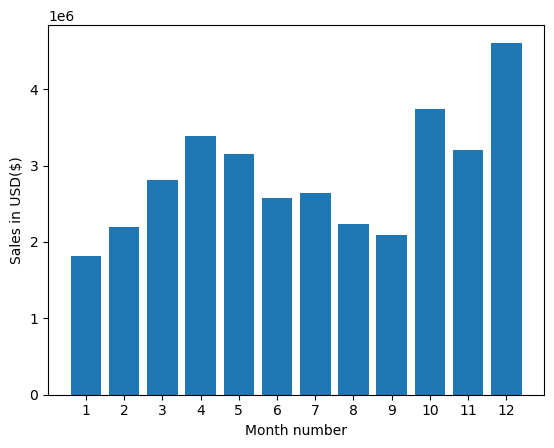

In [22]:
month = month_revenue['Order_Month']
results = month_revenue['Sales']

plt.bar(month, results)
plt.xticks(month)    # to show all the month on the x axis 
plt.ylabel('Sales in USD($)')
plt.xlabel('Month number')
plt.show()

# Question 3: What city had the highest number of sales

In [23]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Dates,Order_Month,Order_Time,Sales
0,147268,Wired Headphones,1.0,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",2019-01-01,1,03:07:00,11.99
1,148041,USB-C Charging Cable,1.0,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",2019-01-01,1,03:40:00,11.95
2,149343,Apple Airpods Headphones,1.0,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",2019-01-01,1,04:56:00,150.00
3,149964,AAA Batteries (4-pack),1.0,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",2019-01-01,1,05:53:00,2.99
4,149350,USB-C Charging Cable,2.0,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",2019-01-01,1,06:03:00,23.90


Add a city column

In [24]:
all_data['City'] = all_data['Purchase Address'].str.split(',').str[1]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Dates,Order_Month,Order_Time,Sales,City
0,147268,Wired Headphones,1.0,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",2019-01-01,1,03:07:00,11.99,New York City
1,148041,USB-C Charging Cable,1.0,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",2019-01-01,1,03:40:00,11.95,San Francisco
2,149343,Apple Airpods Headphones,1.0,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",2019-01-01,1,04:56:00,150.00,New York City
3,149964,AAA Batteries (4-pack),1.0,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",2019-01-01,1,05:53:00,2.99,Dallas
4,149350,USB-C Charging Cable,2.0,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",2019-01-01,1,06:03:00,23.90,Atlanta


In [25]:
# alternative way to get city 

all_data['City_1'] = all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data.head()

del all_data['City_1']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Dates,Order_Month,Order_Time,Sales,City
0,147268,Wired Headphones,1.0,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",2019-01-01,1,03:07:00,11.99,New York City
1,148041,USB-C Charging Cable,1.0,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",2019-01-01,1,03:40:00,11.95,San Francisco
2,149343,Apple Airpods Headphones,1.0,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",2019-01-01,1,04:56:00,150.00,New York City
3,149964,AAA Batteries (4-pack),1.0,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",2019-01-01,1,05:53:00,2.99,Dallas
4,149350,USB-C Charging Cable,2.0,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",2019-01-01,1,06:03:00,23.90,Atlanta


In [26]:
# alternative way to get city 

def get_city(address):
    return address.split(',')[1]

all_data['City_2'] = all_data['Purchase Address'].apply(lambda x: get_city(x))
all_data.head()

del all_data['City_2']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Dates,Order_Month,Order_Time,Sales,City
0,147268,Wired Headphones,1.0,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",2019-01-01,1,03:07:00,11.99,New York City
1,148041,USB-C Charging Cable,1.0,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",2019-01-01,1,03:40:00,11.95,San Francisco
2,149343,Apple Airpods Headphones,1.0,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",2019-01-01,1,04:56:00,150.00,New York City
3,149964,AAA Batteries (4-pack),1.0,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",2019-01-01,1,05:53:00,2.99,Dallas
4,149350,USB-C Charging Cable,2.0,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",2019-01-01,1,06:03:00,23.90,Atlanta


Add a state column --> to make sure the city is not duplicated

In [27]:
all_data['State'] = all_data['Purchase Address'].str.split(',').str[2]
all_data.head()
all_data['State'] = all_data['State'].str.split(' ').str[1]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Dates,Order_Month,Order_Time,Sales,City,State
0,147268,Wired Headphones,1.0,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",2019-01-01,1,03:07:00,11.99,New York City,NY
1,148041,USB-C Charging Cable,1.0,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",2019-01-01,1,03:40:00,11.95,San Francisco,CA
2,149343,Apple Airpods Headphones,1.0,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",2019-01-01,1,04:56:00,150.00,New York City,NY
3,149964,AAA Batteries (4-pack),1.0,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",2019-01-01,1,05:53:00,2.99,Dallas,TX
4,149350,USB-C Charging Cable,2.0,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",2019-01-01,1,06:03:00,23.90,Atlanta,GA


Combine the city and state column to get city_state column

In [28]:
all_data['City_State'] = all_data['City'] + ' ' + '(' + all_data['State'] + ')'
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Dates,Order_Month,Order_Time,Sales,City,State,City_State
0,147268,Wired Headphones,1.0,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",2019-01-01,1,03:07:00,11.99,New York City,NY,New York City (NY)
1,148041,USB-C Charging Cable,1.0,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",2019-01-01,1,03:40:00,11.95,San Francisco,CA,San Francisco (CA)
2,149343,Apple Airpods Headphones,1.0,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",2019-01-01,1,04:56:00,150.00,New York City,NY,New York City (NY)
3,149964,AAA Batteries (4-pack),1.0,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",2019-01-01,1,05:53:00,2.99,Dallas,TX,Dallas (TX)
4,149350,USB-C Charging Cable,2.0,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",2019-01-01,1,06:03:00,23.90,Atlanta,GA,Atlanta (GA)


Alternative way to get city & state 

In [29]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['city_state1'] = all_data['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')
all_data.head()

all_data.drop(columns = 'city_state1', inplace = True)
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Dates,Order_Month,Order_Time,Sales,City,State,City_State
0,147268,Wired Headphones,1.0,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",2019-01-01,1,03:07:00,11.99,New York City,NY,New York City (NY)
1,148041,USB-C Charging Cable,1.0,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",2019-01-01,1,03:40:00,11.95,San Francisco,CA,San Francisco (CA)
2,149343,Apple Airpods Headphones,1.0,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",2019-01-01,1,04:56:00,150.00,New York City,NY,New York City (NY)
3,149964,AAA Batteries (4-pack),1.0,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",2019-01-01,1,05:53:00,2.99,Dallas,TX,Dallas (TX)
4,149350,USB-C Charging Cable,2.0,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",2019-01-01,1,06:03:00,23.90,Atlanta,GA,Atlanta (GA)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185681,298406,AAA Batteries (4-pack),2.0,2.99,2019-12-31 23:42:00,"30 Elm St, San Francisco, CA 94016",2019-12-31,12,23:42:00,5.98,San Francisco,CA,San Francisco (CA)
185682,297481,AA Batteries (4-pack),1.0,3.84,2019-12-31 23:42:00,"82 Hill St, Dallas, TX 75001",2019-12-31,12,23:42:00,3.84,Dallas,TX,Dallas (TX)
185683,317048,AAA Batteries (4-pack),2.0,2.99,2019-12-31 23:45:00,"743 Adams St, San Francisco, CA 94016",2019-12-31,12,23:45:00,5.98,San Francisco,CA,San Francisco (CA)
185684,309773,AAA Batteries (4-pack),1.0,2.99,2019-12-31 23:52:00,"60 Hickory St, Los Angeles, CA 90001",2019-12-31,12,23:52:00,2.99,Los Angeles,CA,Los Angeles (CA)


Find sales by city

In [30]:
city_sales = all_data.groupby(['City_State']).sum()['Sales'].reset_index()
city_sales.sort_values('Sales', ascending = False)

,City_State,Sales
8,San Francisco (CA),8254743.55
4,Los Angeles (CA),5448304.28
5,New York City (NY),4661867.14
2,Boston (MA),3658627.65
0,Atlanta (GA),2794199.07
3,Dallas (TX),2765373.96
9,Seattle (WA),2745046.02
7,Portland (OR),1870010.56
1,Austin (TX),1818044.33
6,Portland (ME),449321.38


Visualize result

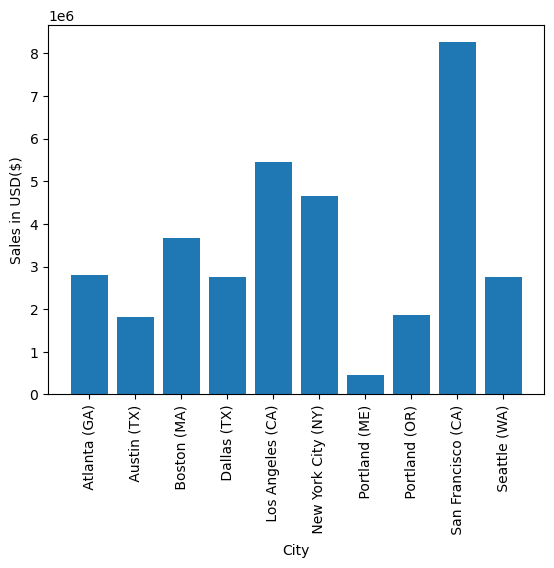

In [31]:
city = city_sales['City_State']
sales = city_sales['Sales']

plt.bar(city, sales)
plt.xticks(city, rotation = 'vertical')    # to show all the month on the x axis 

plt.ylabel('Sales in USD($)')
plt.xlabel('City')
plt.show()

# Question 4: What time should we display advertisements to maximize likelihood of customer's buying product?

In [96]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Dates,Order_Month,Order_Time,Sales,City,State,City_State,Order_Hour,Order_Minute
0,147268,Wired Headphones,1.0,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",2019-01-01,1,03:07:00,11.99,New York City,NY,New York City (NY),3,7
1,148041,USB-C Charging Cable,1.0,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",2019-01-01,1,03:40:00,11.95,San Francisco,CA,San Francisco (CA),3,40
2,149343,Apple Airpods Headphones,1.0,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",2019-01-01,1,04:56:00,150.00,New York City,NY,New York City (NY),4,56
3,149964,AAA Batteries (4-pack),1.0,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",2019-01-01,1,05:53:00,2.99,Dallas,TX,Dallas (TX),5,53
4,149350,USB-C Charging Cable,2.0,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",2019-01-01,1,06:03:00,23.90,Atlanta,GA,Atlanta (GA),6,3


In [114]:
time_sale = all_data.groupby(['Order_Hour']).count().reset_index()
time_sale = time_sale[['Order_Hour', 'Order ID']]
time_sale.head()

,Order_Hour,Order ID
0,0,3902
1,1,2347
2,2,1242
3,3,830
4,4,852


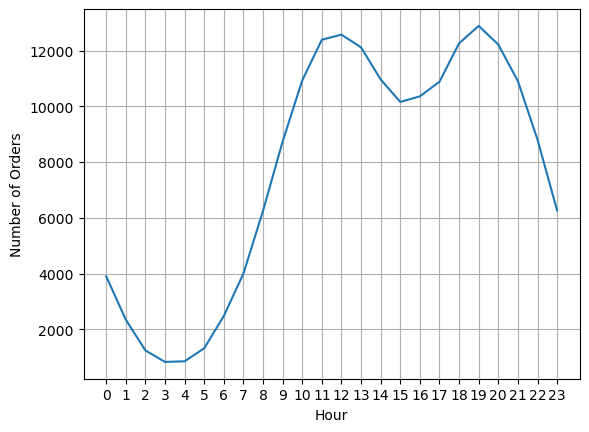

In [117]:
hour = time_sale['Order_Hour']
sales = time_sale['Order ID']

plt.plot(hour, sales)  
plt.xticks(hour)
plt.grid()      # to make it easier to see which hour is best 

plt.ylabel('Number of Orders')
plt.xlabel('Hour')
plt.show()

# My recommendation is around 11-12am or 6-7am 

# Question 5: What products are most often sold together?

In [119]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Dates,Order_Month,Order_Time,Sales,City,State,City_State,Order_Hour,Order_Minute
0,147268,Wired Headphones,1.0,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",2019-01-01,1,03:07:00,11.99,New York City,NY,New York City (NY),3,7
1,148041,USB-C Charging Cable,1.0,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",2019-01-01,1,03:40:00,11.95,San Francisco,CA,San Francisco (CA),3,40
2,149343,Apple Airpods Headphones,1.0,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",2019-01-01,1,04:56:00,150.00,New York City,NY,New York City (NY),4,56
3,149964,AAA Batteries (4-pack),1.0,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",2019-01-01,1,05:53:00,2.99,Dallas,TX,Dallas (TX),5,53
4,149350,USB-C Charging Cable,2.0,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",2019-01-01,1,06:03:00,23.90,Atlanta,GA,Atlanta (GA),6,3


To filter out the products that are bought together --> where Order ID is duplicated in the dataset

In [173]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]   
# keep = False --> to keep all the duplicates
df.head()

# group products with sep = ',' when Order ID is equal 
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

df = df[['Order ID','Grouped']].drop_duplicates() 
df.head()

/var/folders/jx/xbdjzsxn7jgbrsvmdjdknjp40000gn/T/ipykernel_33063/4258928946.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
11,144804,"Wired Headphones,iPhone"
65,148074,"Google Phone,USB-C Charging Cable"
79,148450,"Lightning Charging Cable,iPhone"
92,144679,"Google Phone,USB-C Charging Cable"
94,147451,"Google Phone,Wired Headphones"


In [191]:
df['count'] = 1
df

sales = df.groupby(['Grouped']).sum()
sales.head()

sales = sales.sort_values('count', ascending = False)
sales.head()

# Lightning Charging Cable,iPhone are sold most often together 

,count
Grouped,
"Lightning Charging Cable,iPhone",463
"Google Phone,USB-C Charging Cable",447
"iPhone,Lightning Charging Cable",432
"USB-C Charging Cable,Google Phone",422
"Wired Headphones,iPhone",198


# Question 6: What product sold the most? Why do you think it sold most?


In [194]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Dates,Order_Month,Order_Time,Sales,City,State,City_State,Order_Hour,Order_Minute,count
0,147268,Wired Headphones,1.0,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",2019-01-01,1,03:07:00,11.99,New York City,NY,New York City (NY),3,7,1
1,148041,USB-C Charging Cable,1.0,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",2019-01-01,1,03:40:00,11.95,San Francisco,CA,San Francisco (CA),3,40,1
2,149343,Apple Airpods Headphones,1.0,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",2019-01-01,1,04:56:00,150.00,New York City,NY,New York City (NY),4,56,1
3,149964,AAA Batteries (4-pack),1.0,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",2019-01-01,1,05:53:00,2.99,Dallas,TX,Dallas (TX),5,53,1
4,149350,USB-C Charging Cable,2.0,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",2019-01-01,1,06:03:00,23.90,Atlanta,GA,Atlanta (GA),6,3,1


In [209]:
product = all_data.groupby(['Product']).sum().reset_index()
product = product.sort_values('Quantity Ordered', ascending = False)
product = product.iloc[:,0:2]
product.head()

,Product,Quantity Ordered
5,AAA Batteries (4-pack),30986.0
4,AA Batteries (4-pack),27615.0
15,USB-C Charging Cable,23931.0
12,Lightning Charging Cable,23169.0
17,Wired Headphones,20524.0


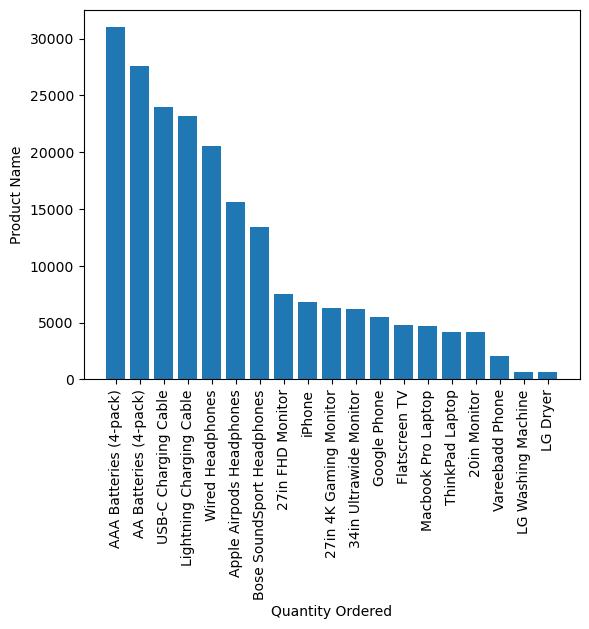

In [214]:
pro = product['Product']
quan = product['Quantity Ordered']

plt.bar(pro, quan)
plt.xticks(pro, rotation = 90)    # to show all the month on the x axis 

plt.ylabel('Product Name')
plt.xlabel('Quantity Ordered')
plt.show()


# AAA Batteries (4-pack) was sold the most
# Reasons: Cheap? 

To visualize the guess: AAA Batteries (4-pack) was sold the most because they are cheap

In [216]:
prices = all_data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

/var/folders/jx/xbdjzsxn7jgbrsvmdjdknjp40000gn/T/ipykernel_33063/2960416160.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(pro, rotation = 90, size = 8)


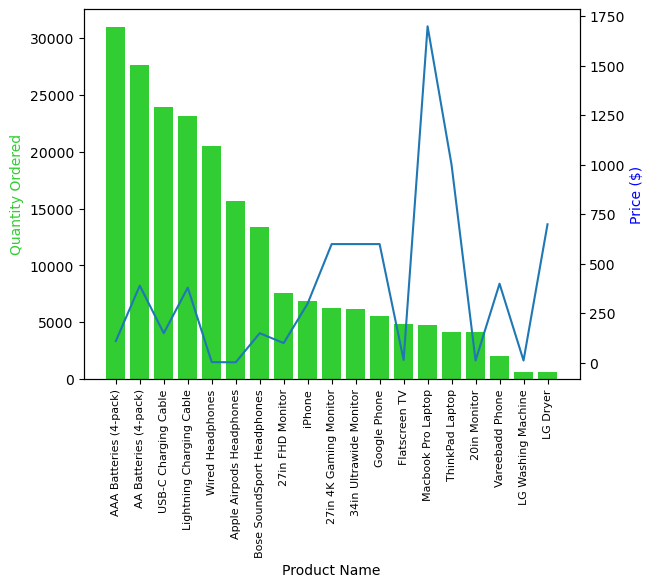

In [227]:
fig, ax1 = plt.subplots()

pro = product['Product']
quan = product['Quantity Ordered']


ax2 = ax1.twinx()
ax1.bar(pro, quan, color = 'limegreen')
ax2.plot(pro, prices)


ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color = 'limegreen')
ax2.set_ylabel('Price ($)', color = 'b')

ax1.set_xticklabels(pro, rotation = 90, size = 8)

plt.show()


# Answer: 
# AAA Batteries (4-pack) was sold the most
# Reasons: Cheap? 